## Visualizing and Understanding Convolutional Networks

In [8]:
import torch
import torch.nn as nn
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage

from deconv import Vgg_Convnet, Vgg_Deconvnet, get_activation

import matplotlib.pyplot as plt
import numpy as np 

%matplotlib inline

In [9]:
# Load Images
transform = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                ])

image_data = ImageFolder(root='./data/train/', transform=transform)


In [33]:
#Device Setting
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#Load Models
model = Vgg_Convnet()
model = model.to(device)
model_path = './conv_checkpoint/conv_best_5.pth'
model.load_state_dict(torch.load(model_path))
model.eval()

deconv = Vgg_Deconvnet(model)
deconv = deconv.to(device)

In [12]:
def visualize_layer(layer_num, data_idx):
    #layer_num = 1
    #data_idx = [0,1,2,3,4,2503, 2504, 2505, 2506, 2508]

    fig=plt.figure(figsize=(20, 20))
    columns = 5
    rows = 4
    for i in range(1,6):

        img = image_data[data_idx[i-1]][0].numpy()
        fig.add_subplot(rows, columns, i)
        plt.imshow(np.transpose(img, (1,2,0)), interpolation='nearest')

        plt.axis('off')
        plt.subplots_adjust(wspace=0, hspace=0)

        input_img = image_data[data_idx[i-1]][0].reshape(1,3,224,224)
        input_img = input_img.to(device)
        pool_indices, feature_map = model(input_img, layer_num)

        list_idx, activation = get_activation(feature_map)
        activation = activation.to(device)
        output = deconv(layer_num, pool_indices, feature_map)

        output = output.reshape(3,output.shape[2], output.shape[3])
        output = output.permute(1,2,0)
        output = output.cpu()
        output = output.data.numpy()
        normalized = (output - output.min())/(output.max() - output.min())
        fig.add_subplot(rows, columns, i+5)
        plt.imshow(normalized)

        plt.axis('off')
        plt.subplots_adjust(wspace=0, hspace=0)

    plt.show()


## 1st layer

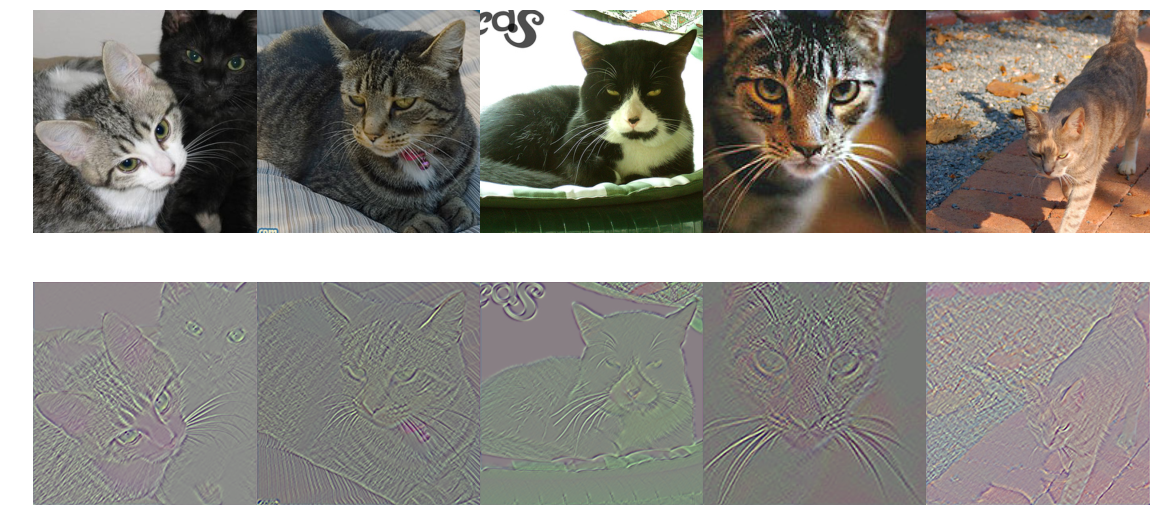

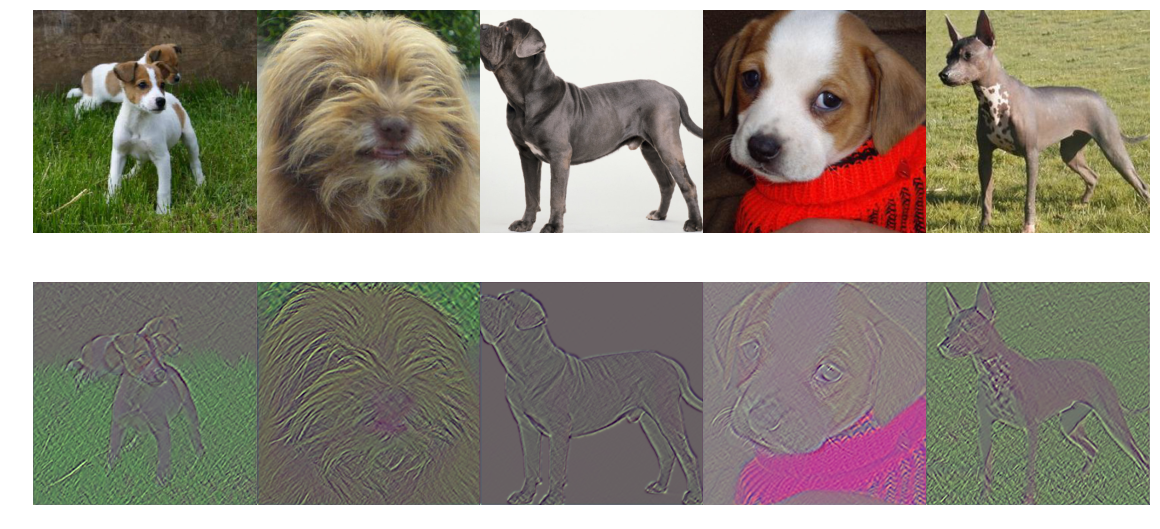

In [13]:
layer_num = 1
data_idx = [0,1,2,3,4]
visualize_layer(layer_num,data_idx)

data_idx = [2503, 2504, 2505, 2506, 2508]
visualize_layer(layer_num,data_idx)

## 2nd layer

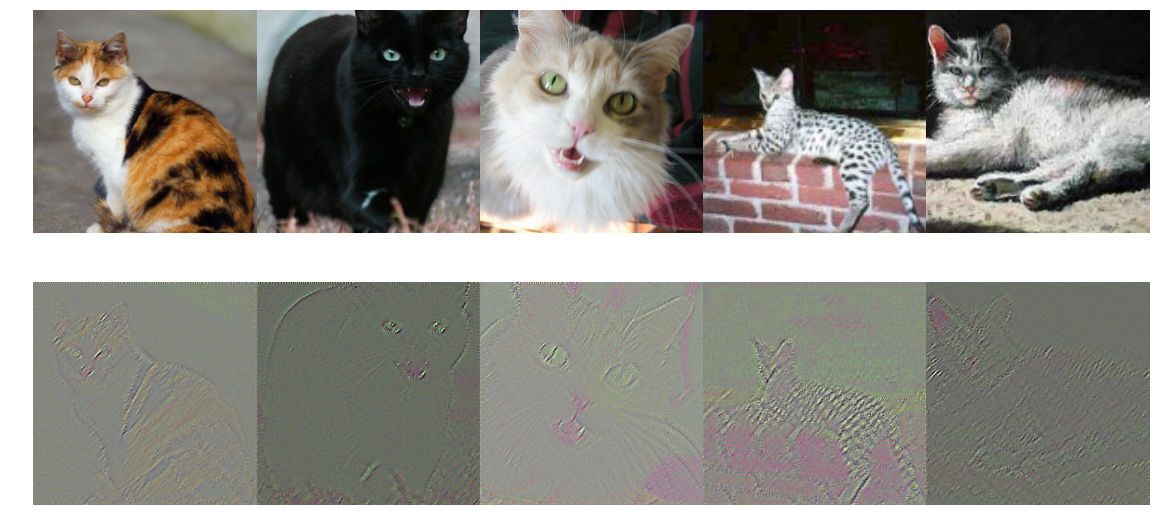

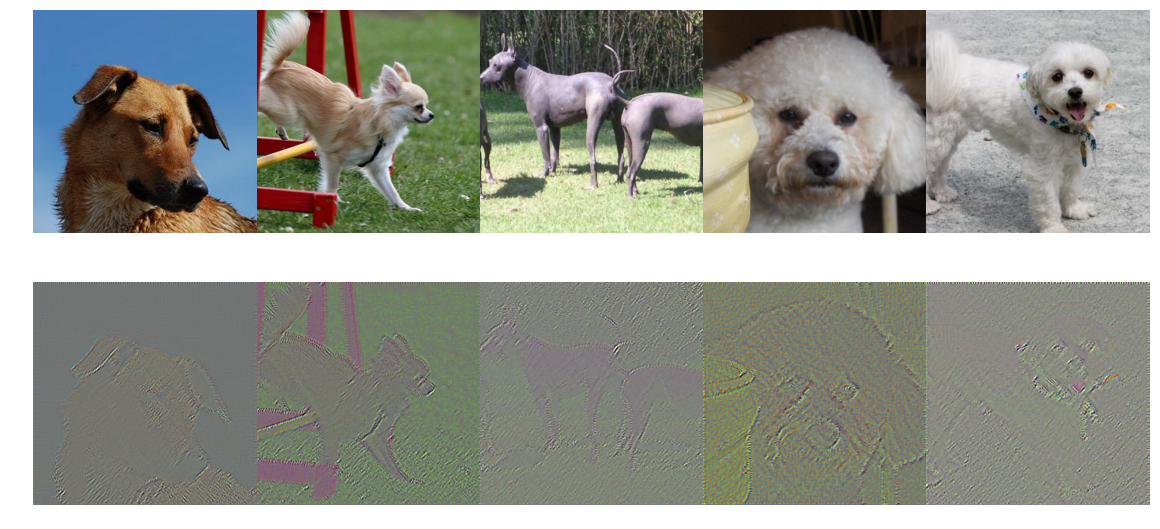

In [25]:
layer_num = 2
data_idx = [10, 14, 15, 16, 17]
visualize_layer(layer_num,data_idx)

data_idx = [2000,2001,2002,2003,2004]
visualize_layer(layer_num,data_idx)

## 3rd layer

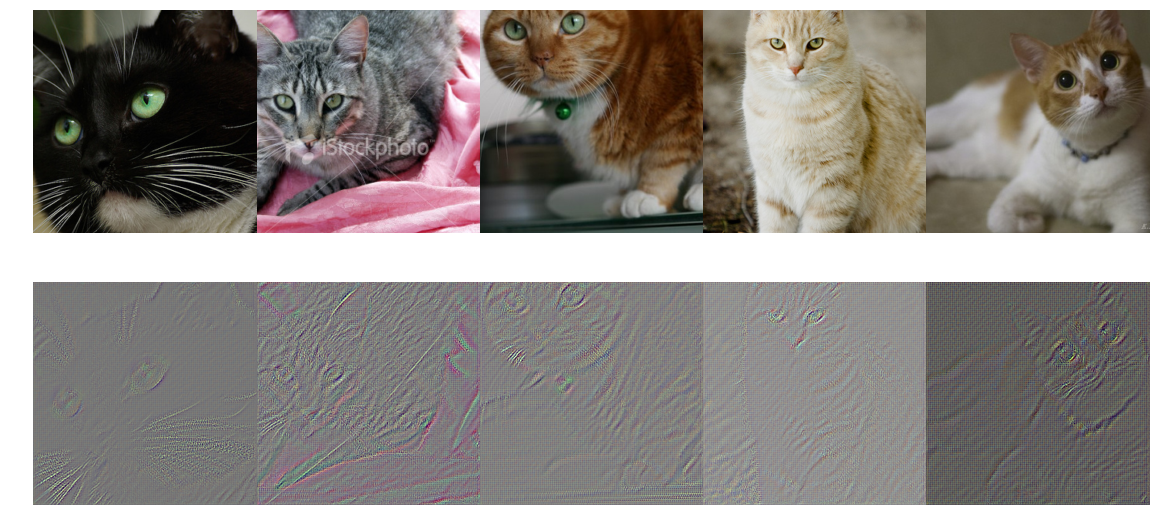

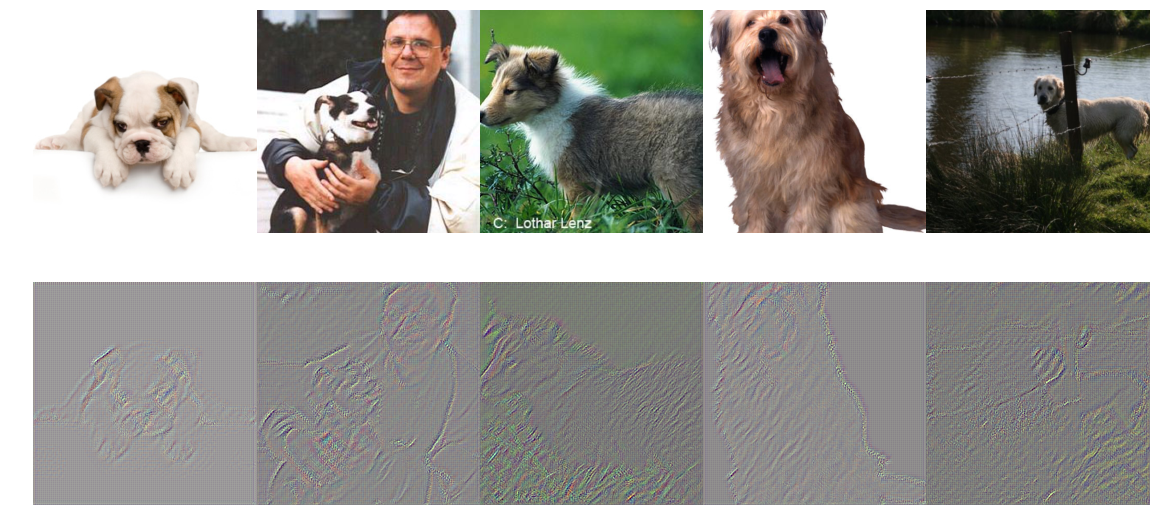

In [34]:
layer_num = 3
data_idx = [100, 106, 107, 109, 113]
visualize_layer(layer_num,data_idx)

data_idx = [2100, 3000, 2700, 2701, 2702]
visualize_layer(layer_num,data_idx)